## Using lambdify for plotting expressions
The syntethic isotope Technetium-99m is used in medical diagnostics ([scintigraphy](https://en.wikipedia.org/wiki/Nuclear_medicine)):
$$
^{99m}Tc \overset{\lambda_1}{\longrightarrow} \,^{99}Tc \overset{\lambda_2}{\longrightarrow} \,^{99}Ru \\
\lambda_1 = 3.2\cdot 10^{-5}\,s^{-1} \\
\lambda_2 = 1.04 \cdot 10^{-13}\,s^{-1} \\
$$
SymPy can solve the differential equations describing the amounts versus time analytically.
Let's denote the concentrations of each isotope $x(t),\ y(t)\ \&\ z(t)$ respectively.

In [1]:
import sympy as sym
sym.init_printing()

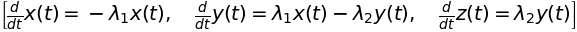

In [2]:
symbs = t, l1, l2, x0, y0, z0 = sym.symbols('t lambda_1 lambda_2 x0 y0 z0', real=True, nonnegative=True)
funcs = x, y, z = [sym.Function(s)(t) for s in 'xyz']
inits = [f.subs(t, 0) for f in funcs]
diffs = [f.diff(t) for f in funcs]
exprs = -l1*x, l1*x - l2*y, l2*y
eqs = [sym.Eq(diff, expr) for diff, expr in zip(diffs, exprs)]
eqs

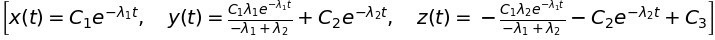

In [3]:
solutions = sym.dsolve(eqs)
solutions

now we need to determine the integration constants from the intial conditions:

In [4]:
integration_constants = set.union(*[sol.free_symbols for sol in solutions]) - set(symbs)
integration_constants

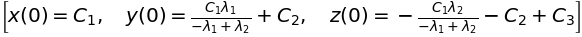

In [5]:
initial_values = [sol.subs(t, 0) for sol in solutions]
initial_values

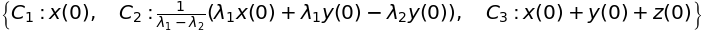

In [6]:
const_exprs = sym.solve(initial_values, integration_constants)
const_exprs

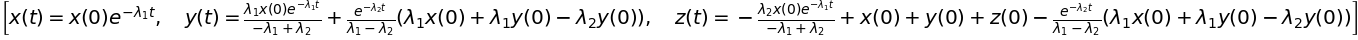

In [7]:
analytic = [sol.subs(const_exprs) for sol in solutions]
analytic

## Exercise: Create a function from a symbolic expression
We want to plot the time evolution of x, y & z from the above analytic expression (called ``analytic`` above):

In [8]:
from math import log10
import numpy as np
year_s = 365.25*24*3600
tout = np.logspace(0, log10(3e6*year_s), 500)  # 1 s to 3 million years

In [9]:
%load_ext scipy2017codegen.exercise

*Use either the *``%exercise``* or *``%load``* magic to get the exercise / solution respecitvely:*

Replace **???** so that `f(t)` evaluates $x(t),\ y(t)\ \&\ z(t)$. Hint: use the right hand side of the equations in ``analytic`` (use the attribute ``rhs`` of the items in ``anayltic``):

In [10]:
# %exercise exercise_Tc99.py
xyz_num = sym.lambdify([t, l1, l2, *inits], [eq.rhs for eq in analytic])
yout = xyz_num(tout, 3.2e-5, 1.04e-13, 1, 0, 0)

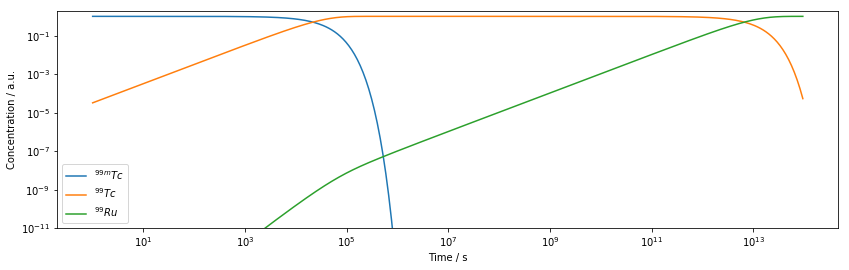

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(14, 4))
ax.loglog(tout.reshape((tout.size, 1)), np.array(yout).T)
ax.legend(['$^{99m}Tc$', '$^{99}Tc$', '$^{99}Ru$'])
ax.set_xlabel('Time / s')
ax.set_ylabel('Concentration / a.u.')
_ = ax.set_ylim([1e-11, 2])